In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
p = 0.5
M = 100000
data = np.random.binomial(n=1, p=p, size=M)

In [6]:
print(data.mean())
print(data.std())

0.49943
0.4999996751


In [18]:
def generate_X_bar(N=100):
    return np.random.binomial(n=1, p=p, size=N).mean()
N=100
M = 100000
tout = np.array([generate_X_bar() for _ in range(M)])

1.25 s ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
print(tout.mean())
print(tout.std())

0.5001823
0.0501598621082


In [19]:
N = 100
tout = np.random.binomial(n=1, p=p, size=(N, M)).mean(axis=0)

In [20]:
print(tout.mean())
print(tout.std())

0.4995892
0.0500618541742


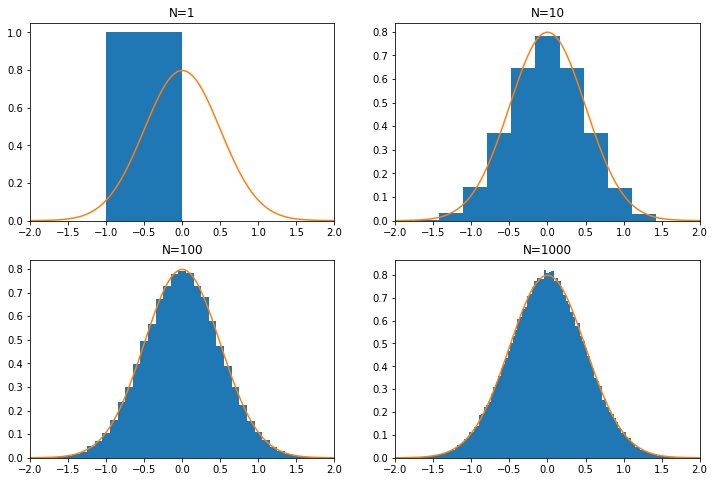

In [31]:
sigma = sqrt(p*(1-p))
figure(figsize=(12, 8))
for i, N in enumerate([1, 10, 100, 1000]):
    subplot(2, 2, i+1)
    title("N={N}".format(N=N))
    Y = (np.random.binomial(n=1, p=p, size=(N, M)).mean(axis=0)- p)*sqrt(N)
    hist(Y, bins=((arange(N+1)-.5)/N -p)*sqrt(N), normed=True)
    x = linspace(-2, 2, 100)
    plot(x, 1/sqrt(2*pi*sigma**2)*exp(-x**2/(2*sigma**2)))
    xlim(-2, 2)

(0, 1)

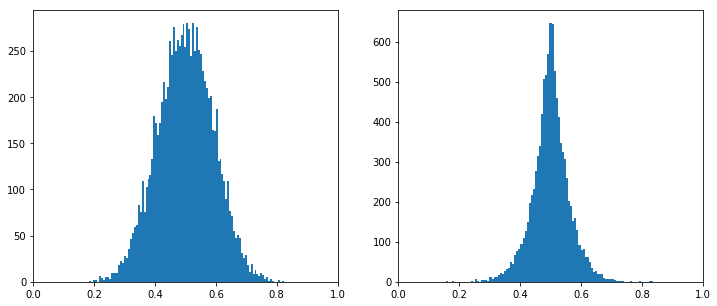

In [39]:
N=10
M = 10000

data = np.random.rand(N, M)

mu_moyenne = data.mean(axis=0)
mu_max_min = ( data.min(axis=0) + data.max(axis=0) )/2

figure(figsize=(12, 5))
subplot(1, 2, 1)
hist(mu_moyenne, bins=100)
xlim(0, 1)
subplot(1, 2, 2)
hist(mu_max_min, bins=100)
xlim(0, 1)

In [46]:
out = []
TN = [10, 30, 100, 300, 1000]
for N in TN:
    M = 1000

    data = np.random.rand(N, M)

    mu_moyenne = data.mean(axis=0)
    mu_max_min = ( data.min(axis=0) + data.max(axis=0) )/2

    erreur_moyenne = ((mu_moyenne - 0.5)**2).mean()
    erreur_max_min = ((mu_max_min - 0.5)**2).mean()
    out.append([erreur_moyenne, erreur_max_min])
    
out =  array(out)

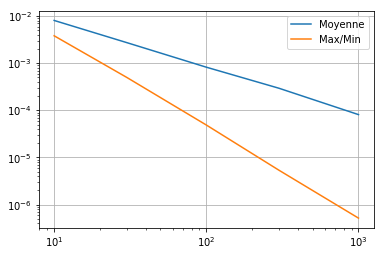

In [48]:
loglog(TN, out[:,0], label='Moyenne')
loglog(TN, out[:,1], label='Max/Min')
grid()
legend()